[finding-important-factors-to-survive-titanic](#https://www.kaggle.com/jatturat/finding-important-factors-to-survive-titanic)

[EDA of important features](#https://www.kaggle.com/dollardollar/eda-of-important-features)

## 1. Exploratory Data Analysis (EDA)

### 1A. Import Libraries and Settings

In [1]:
# ! conda install --yes seaborn

In [2]:
# Basic Libraries
import numpy as np 
import pandas as pd

# Operational System
import os

# Feature Scaling
#from sklearn.preprocessing import RobustScaler

# Visaulization
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier (machine learning algorithm) 
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# Evaluation
# from sklearn.model_selection import cross_val_score, cross_val_predict

# Parameter Tuning
# from sklearn.model_selection import GridSearchCV

# Settings
# pd.options.mode.chained_assignment = None # Stop warning when use inplace=True of fillna

### 2B. Import Dataset

In [3]:
print(os.getcwd())

/home/daniel/Notebooks/kaggle


In [4]:
train_set = pd.read_csv('data/titanic_train.csv')
test_set = pd.read_csv('data/titanic_test.csv')

### 2C. Dataset Checking

In [5]:
train_set.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [6]:
test_set.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

In [7]:
# number of rows
len(train_set)

891

In [8]:
train_set.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
train_set.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
len(test_set)

418

In [12]:
test_set.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [13]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 2D. Features Visualization
The first thing to do is to visualize the data and find any valuable/hidden information inside each feature. In this section, I tried to visualize existing data first without filling the missing data yet to keep things in steps.

I use these methods to create graphs based on type of each feature.

In [14]:
# Continuous Data Plot

def cont_plot(df, feature_name, target_name, palettemap, hue_order, feature_scale):
    df['Counts'] = "" # A trick to skip using an axis (either x or y) on splitting violinplot
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(14,5))
    sns.distplot(df[feature_name], ax=axis0);
    sns.violinplot(x=feature_name, y="Counts", hue=target_name, hue_order=hue_order, data=df,
                   palette=palettemap, split=True, orient='h', ax=axis1)
    axis1.set_xticks(feature_scale)
    plt.show()
    # WARNING: This will leave Counts column in dataset if you continues to use this dataset

# Categorical/Ordinal Data Plot

def cat_plot(df, feature_name, target_name, palettemap): 
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(14,5))
    df[feature_name].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)
    sns.countplot(x=feature_name, hue=target_name, data=df,
                  palette=palettemap, ax=axis1, )
    plt.show()

    
survival_palette = {0: "black", 1: "orange"} # Color map for visualization

#### 2Da. Pclass

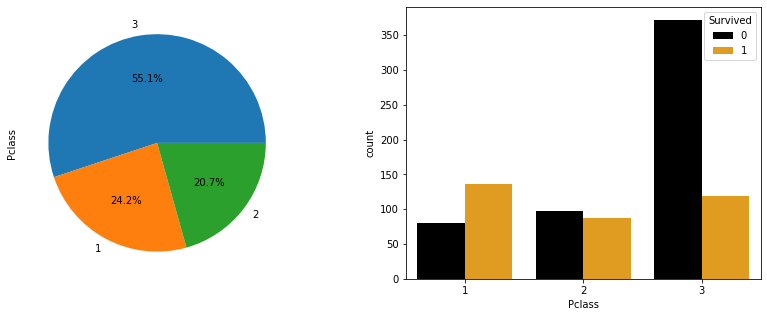

In [15]:
cat_plot(train_set, 'Pclass','Survived', survival_palette)

# year_palette = {0: "black", 1899: "orange", 2018: "green"}
# cat_plot(solditems_pd, 'domain','year', survival_palette)

#### 2Db. Sex

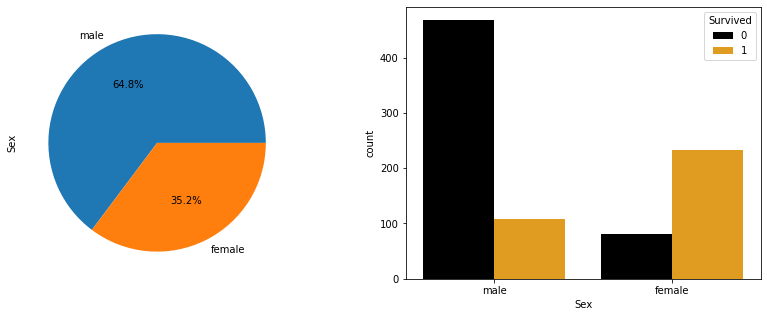

In [16]:
cat_plot(train_set, 'Sex', 'Survived', survival_palette)

#### 2Dc. Embarked

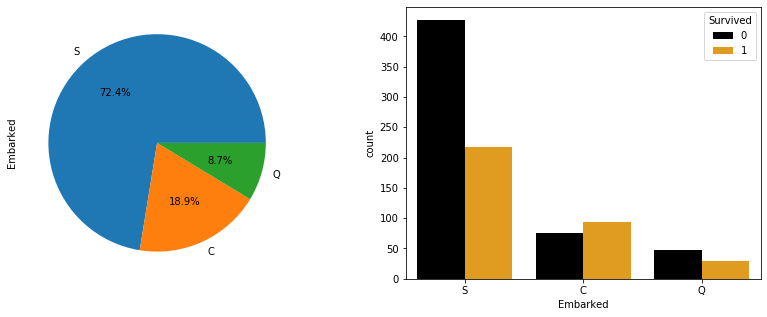

In [17]:
cat_plot(train_set, 'Embarked', 'Survived', survival_palette)

#### 2Dd. Age

In [18]:
# dropping temporaly null because visualization method can't deal with missing data
age_set_nonan = train_set[['Age','Survived']].copy().dropna(axis=0)

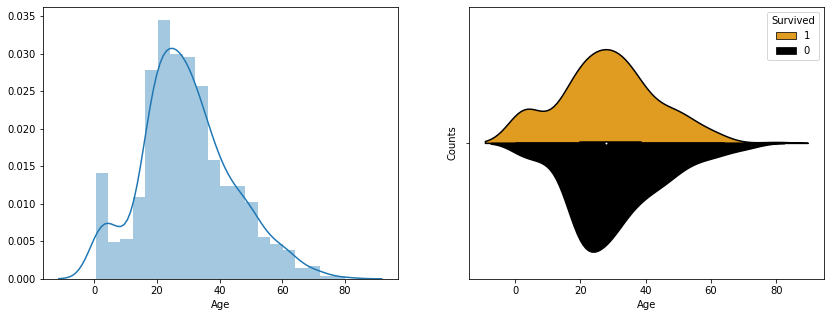

In [19]:
cont_plot(age_set_nonan, 'Age', 'Survived', survival_palette, hue_order=[1,0], feature_scale=range(0,100,20))

In [20]:
min_age = min(age_set_nonan.Age)
min_age

0.42

In [21]:
age_set_nonan.Age.sort_values()

803     0.42
755     0.67
644     0.75
469     0.75
78      0.83
       ...  
116    70.50
493    71.00
96     71.00
851    74.00
630    80.00
Name: Age, Length: 714, dtype: float64

In [22]:
max_age = max(train_set.Age)
max_age

80.0

In [23]:
# Creating categories for age
age_bins = [0, 15, 30, 45, 60, 75, max_age+10]
age_labels = ['1.[0, 15)','2.[15, 30)','3.[30, 45)','4.[45, 60)','5.[60, 75)', f'6.[75, {max_age+10})']

In [24]:
age_set_nonan['AgeRange'] = pd.cut(age_set_nonan['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [25]:
age_set_nonan.head()

Age  Survived Counts    AgeRange
0  22.0         0         2.[15, 30)
1  38.0         1         3.[30, 45)
2  26.0         1         2.[15, 30)
3  35.0         1         3.[30, 45)
4  35.0         0         3.[30, 45)

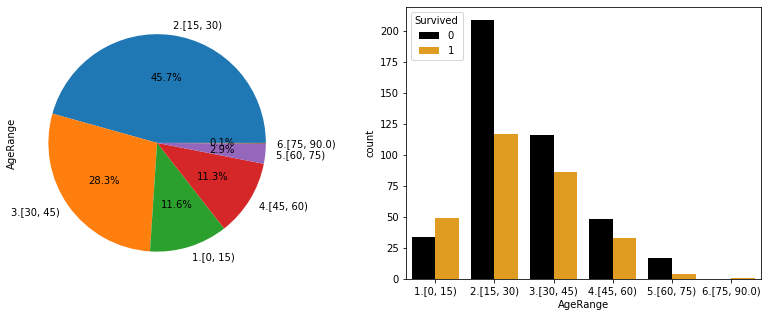

In [26]:
cat_plot(age_set_nonan, 'AgeRange', 'Survived', palettemap=survival_palette)

### 2E. Check for Correlations

When 2 features or more have correlation, that means they are explaining each others while giving only a few or none of new information. Try to imagine if TitleGroup feature only has 2 classes, 'Mr.' and 'Miss.'. We can be sure that all male data would have Mr. title and all female have Miss. title. Features with correlation would lead to overfitting on machine learning model, which might result in high accuracy on training dataset while decrease accuracy on test dataset.

#### 2Ea. Fill null values and creting categories

In [27]:
fare_bins = [0,10,30,60,999999]
fare_labels = ['10-','10-30','30-60','60+']

# fill nulls with meadian
train_set["Fare"].fillna(train_set["Fare"].median(), inplace=True)

# creating categories
train_set['FareRange'] = pd.cut(train_set['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

In [28]:
age_bins = [0, 15, 30, 45, 60, 75, max_age+10]
age_labels = ['1.[0, 15)','2.[15, 30)','3.[30, 45)','4.[45, 60)','5.[60, 75)', f'6.[75, {max_age+10})']

# fill nulls with meadian
train_set["Age"].fillna(train_set["Age"].median(), inplace=True)

# creating categories
train_set['AgeRange'] = pd.cut(train_set['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [29]:
train_set["Embarked"].fillna(train_set["Embarked"].value_counts().index[0], inplace=True)

In [30]:
# checking nulls
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FareRange        0
AgeRange         0
dtype: int64

In [31]:
# Drop no category features
train_analysis = train_set.drop(['PassengerId','Name','Age','Fare','Ticket','Cabin','SibSp','Parch'], axis=1)

In [32]:
train_analysis

Survived  Pclass     Sex Embarked FareRange    AgeRange
0           0       3    male        S       10-  2.[15, 30)
1           1       1  female        C       60+  3.[30, 45)
2           1       3  female        S       10-  2.[15, 30)
3           1       1  female        S     30-60  3.[30, 45)
4           0       3    male        S       10-  3.[30, 45)
..        ...     ...     ...      ...       ...         ...
886         0       2    male        S     10-30  2.[15, 30)
887         1       1  female        S     10-30  2.[15, 30)
888         0       3  female        S     10-30  2.[15, 30)
889         1       1    male        C     10-30  2.[15, 30)
890         0       3    male        Q       10-  3.[30, 45)

[891 rows x 6 columns]

#### 2Ea. Encoding Data for Analysis
Many methods of Python libraries don't accept text input, so I need to encode categorical features into ordinal numbers. I encode them manually, because I want to assign the label's order.

In [33]:
sex_encode = {'male': 0, 'female': 1}
train_analysis['Sex'] = train_analysis['Sex'].map(sex_encode).astype(int)

embarked_encode = {'C': 0, 'Q': 1, 'S': 2}
train_analysis['Embarked'] = train_analysis['Embarked'].map(embarked_encode).astype(int)

agerange_encode = dict(zip(age_labels, list(range(len(age_labels)))))
train_analysis['AgeRange'] = train_analysis['AgeRange'].map(agerange_encode).astype(int)

farerange_encode = dict(zip(fare_labels, list(range(len(fare_labels)))))
train_analysis['FareRange'] = train_analysis['FareRange'].map(farerange_encode).astype(int)

In [34]:
train_analysis

Survived  Pclass  Sex  Embarked  FareRange  AgeRange
0           0       3    0         2          0         1
1           1       1    1         0          3         2
2           1       3    1         2          0         1
3           1       1    1         2          2         2
4           0       3    0         2          0         2
..        ...     ...  ...       ...        ...       ...
886         0       2    0         2          1         1
887         1       1    1         2          1         1
888         0       3    1         2          1         1
889         1       1    0         0          1         1
890         0       3    0         1          0         2

[891 rows x 6 columns]

#### 2Eb. Computing Correlations

In [40]:
triang_mask = np.zeros((train_analysis.shape[1], train_analysis.shape[1]))
triang_mask[np.triu_indices_from(triang_mask)] = True

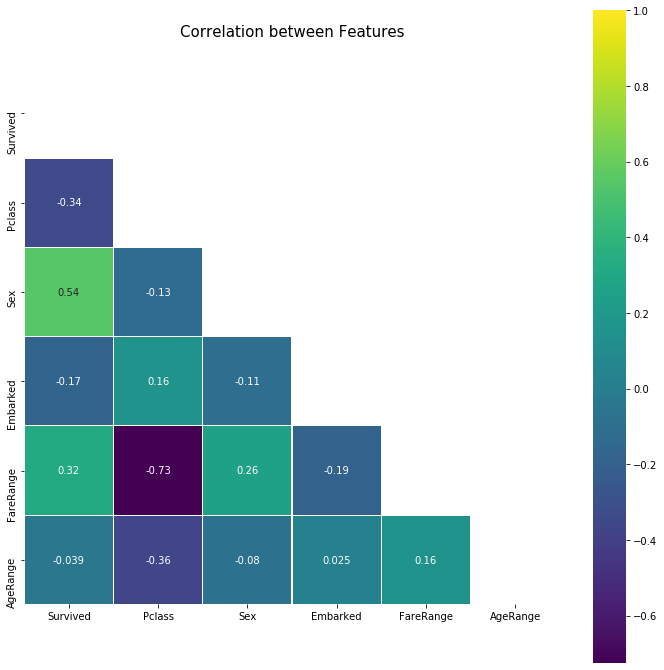

In [42]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation between Features', y=1.05, size = 15)
sns.heatmap(train_analysis.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True,
            mask=triang_mask)